In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **IMPORT**

In [65]:
!pip install geopandas
!pip install pyproj

from pyproj import CRS
import geopandas as gpd
import zipfile
import shapefile
import os
import matplotlib.pyplot as plt

In [8]:
zip_path = '/content/drive/MyDrive/train_dataset_codd_train.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/data')


In [26]:
data = gpd.read_file('/content/data/Векторные данные/Streets_2очередь.shp')

In [27]:
data.head(10)

,ST_NAME,ST_TYP_BEF,ST_NM_BASE,ROAD_CATEG,RoadDirect,RbndStght,RbndBck,Width,MaxSpdDrct,AvgSpdDrct,MaxSpdRvrs,AvgSpdRvrs,Foot,Car,geometry
0,None,None,None,Прочие улицы города,T,1.0,1.0,6.0,0,0,60,51,1,1,"LINESTRING (4172103.98 7467757.54, 4172074.73 ..."
1,Проектируемый 7048-й проезд,проезд,Проектируемый 7048-й,Магистральные улицы города,Any,2.0,2.0,12.0,60,60,60,60,1,1,"LINESTRING (4172045.7 7467735.85, 4172027.72 7..."
2,None,None,None,Прочие улицы города,F,1.0,1.0,6.0,40,40,0,0,1,1,"LINESTRING (4172103.98 7467757.54, 4172184.02 ..."
3,None,None,None,Магистральные улицы города,F,2.0,1.0,9.0,60,60,0,0,1,1,"LINESTRING (4171887.34 7467940.43, 4171866.18 ..."
4,None,None,None,Прочие улицы города,T,1.0,1.0,6.0,0,0,40,33,1,1,"LINESTRING (4173106.26 7468130.3, 4173008.28 7..."
5,None,None,None,Внутриквартальные проезды,Any,1.0,1.0,6.0,20,20,20,20,1,1,"LINESTRING (4173096.46 7468156.82, 4173092.82 ..."
6,None,None,None,Прочие улицы города,T,1.0,1.0,6.0,0,0,20,20,1,1,"LINESTRING (4172855.36 7468037.16, 4172843.97 ..."
7,None,None,None,Внутриквартальные проезды,Any,1.0,1.0,6.0,20,20,20,20,1,1,"LINESTRING (4172913.52 7468339.03, 4172878.33 ..."
8,None,None,None,Прочие улицы города,F,1.0,1.0,6.0,40,32,0,0,1,1,"LINESTRING (4173106.26 7468130.3, 4173253.8 74..."
9,None,None,None,Прочие улицы города,F,1.0,1.0,6.0,60,52,0,0,1,1,"LINESTRING (4173244.04 7468211.6, 4173193.8 74..."


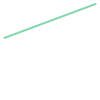

In [30]:
data['geometry'][0]

In [60]:
prj_file_path = '/content/data/Векторные данные/Streets_2очередь.prj'

with open(prj_file_path, 'r') as file:
    prj_data = file.read()

crs = CRS(prj_data)
print(crs)

PROJCS["WGS_1984_Web_Mercator_Auxiliary_Sphere",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Mercator_Auxiliary_Sphere"],PARAMETER["False_Easting",0.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",0.0],PARAMETER["Standard_Parallel_1",0.0],PARAMETER["Auxiliary_Sphere_Type",0.0],UNIT["Meter",1.0]]


         Type                Purpose  Elevation  Entrances  Apartments  \
0  Жилые дома  Малоэтажный жилой дом          3        4.0        86.0   
1  Жилые дома  Малоэтажный жилой дом          3        4.0        86.0   
2  Жилые дома  Малоэтажный жилой дом          3        4.0        86.0   
3  Жилые дома  Малоэтажный жилой дом          3        4.0        86.0   
4  Жилые дома  Малоэтажный жилой дом          3        3.0        98.0   

     District            Street Number  \
0  Коммунарка  Потаповская Роща   2 к3   
1  Коммунарка  Потаповская Роща   1 к2   
2  Коммунарка  Потаповская Роща   1 к1   
3  Коммунарка  Потаповская Роща   3 к1   
4  Коммунарка  Потаповская Роща   2 к4   

                                            geometry  
0  POLYGON ((4174099 7468553.82, 4174054.11 74684...  
1  POLYGON ((4173865 7468327.02, 4173908.89 74683...  
2  POLYGON ((4174008.05 7468232.57, 4173991.51 74...  
3  POLYGON ((4173744.26 7468440.36, 4173741.92 74...  
4  POLYGON ((4174166.95 746

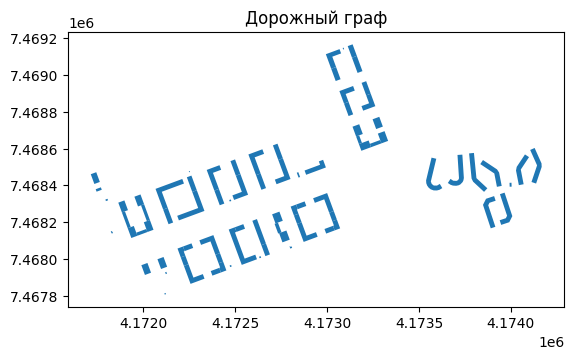

In [64]:
import geopandas as gpd
import matplotlib.pyplot as plt

shapefile_path = '/content/data/try' #.shx .dbf
data = gpd.read_file(shapefile_path)

print(data.head())
print(data.info())
print("Колонки в данных:", data.columns)

data.plot()
plt.title('Дорожный граф')
plt.show()

if 'RoadDirect' in data.columns:
    print("Уникальные значения в колонке 'RoadDirect':", data['RoadDirect'].unique())

if 'ST_TYP_BEF' in data.columns:
    print("Уникальные значения в колонке 'ST_TYP_BEF':", data['ST_TYP_BEF'].unique())



Файл Дома_исходные.shp:


/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:198: RuntimeWarning: /content/data/Векторные данные/Дома_исходные.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


   Name        Type Caption                Purpose PostIndex  Elevation  \
0  None  Жилые дома    None               Таунхаус    108803        2.0   
1  None  Жилые дома    None              Жилой дом    108803       10.0   
2  None  Жилые дома    None              Жилой дом    108803        9.0   
3  None  Жилые дома    None  Малоэтажный жилой дом    108803        3.0   
4  None  Жилые дома    None  Малоэтажный жилой дом    108803        3.0   

   Entrances  Apartments    District        DistrictId  ... StreetId2 Number2  \
0        NaN         NaN  Коммунарка  4504209520926899  ...      None    None   
1        3.0       108.0  Коммунарка  4504209520926899  ...      None    None   
2        2.0        67.0  Коммунарка  4504209520926899  ...      None    None   
3        3.0        18.0  Коммунарка  4504209520926899  ...      None    None   
4        2.0        24.0  Коммунарка  4504209520926899  ...      None    None   

  Street3 StreetId3 Number3 Street4 StreetId4 Number4     Mate

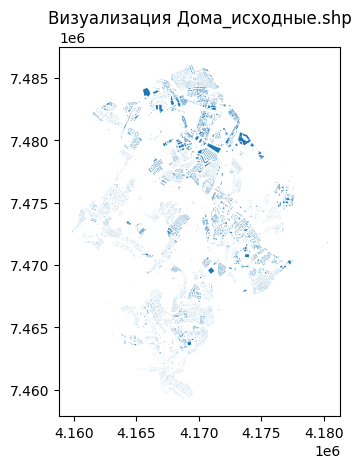


Файл House_1очередь_ЖК.shp:
         Type                Purpose  Elevation  Entrances  Apartments  \
0  Жилые дома  Малоэтажный жилой дом          3        4.0        86.0   
1  Жилые дома  Малоэтажный жилой дом          3        4.0        86.0   
2  Жилые дома  Малоэтажный жилой дом          3        4.0        86.0   
3  Жилые дома  Малоэтажный жилой дом          3        4.0        86.0   
4  Жилые дома  Малоэтажный жилой дом          3        3.0        98.0   

     District            Street Number  \
0  Коммунарка  Потаповская Роща   2 к3   
1  Коммунарка  Потаповская Роща   1 к2   
2  Коммунарка  Потаповская Роща   1 к1   
3  Коммунарка  Потаповская Роща   3 к1   
4  Коммунарка  Потаповская Роща   2 к4   

                                            geometry  
0  POLYGON ((4174099 7468553.82, 4174054.11 74684...  
1  POLYGON ((4173865 7468327.02, 4173908.89 74683...  
2  POLYGON ((4174008.05 7468232.57, 4173991.51 74...  
3  POLYGON ((4173744.26 7468440.36, 4173741.92 74... 

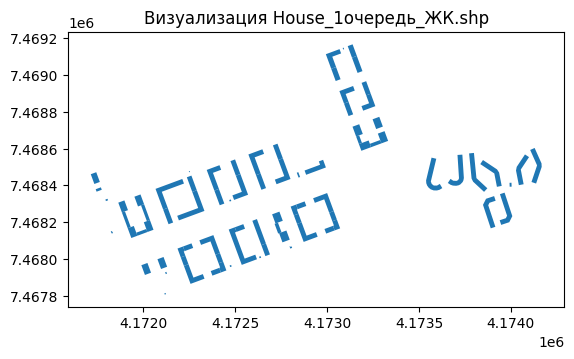


Файл House_2очередь_ЖК.shp:
         Type                Purpose  Elevation  Entrances  Apartments  \
0  Жилые дома              Жилой дом         20        2.0       144.0   
1  Жилые дома              Жилой дом         17        5.0       384.0   
2  Жилые дома  Малоэтажный жилой дом          3        4.0        86.0   
3  Жилые дома              Жилой дом         17        3.0       160.0   
4  Жилые дома              Жилой дом         17        3.0       189.0   

     District                Street  Number  \
0  Коммунарка  Александры Монаховой   95 к4   
1  Коммунарка  Александры Монаховой  105 к1   
2  Коммунарка      Потаповская Роща    2 к3   
3  Коммунарка  Александры Монаховой     103   
4  Коммунарка  Александры Монаховой  105 к2   

                                            geometry  
0  POLYGON ((4173680.58 7467866.46, 4173779.08 74...  
1  POLYGON ((4173928.2 7467648.64, 4173979.75 746...  
2  POLYGON ((4174099 7468553.82, 4174054.11 74684...  
3  MULTIPOLYGON (((4173

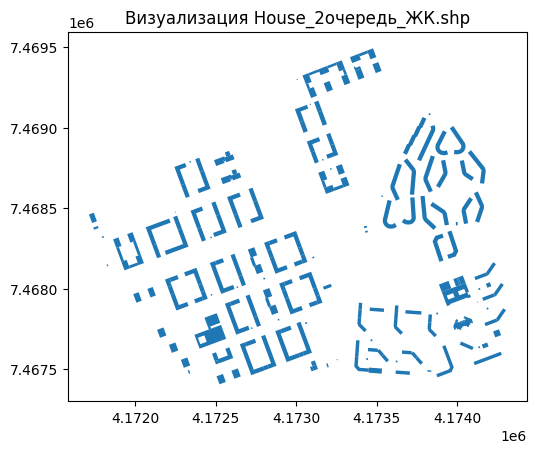


Файл Streets_1очередь.shp:
                       ST_NAME ST_TYP_BEF            ST_NM_BASE  \
0                         None       None                  None   
1  Проектируемый 7048-й проезд     проезд  Проектируемый 7048-й   
2                         None       None                  None   
3                         None       None                  None   
4                         None       None                  None   

                   ROAD_CATEG RoadDirect  RbndStght  RbndBck  Width  \
0         Прочие улицы города          T        1.0      1.0    6.0   
1  Магистральные улицы города        Any        2.0      2.0   12.0   
2         Прочие улицы города          F        1.0      1.0    6.0   
3  Магистральные улицы города          F        2.0      1.0    9.0   
4         Прочие улицы города          T        1.0      1.0    6.0   

   MaxSpdDrct  AvgSpdDrct  MaxSpdRvrs  AvgSpdRvrs  Foot  Car  \
0           0           0          60          51     1    1   
1          60 

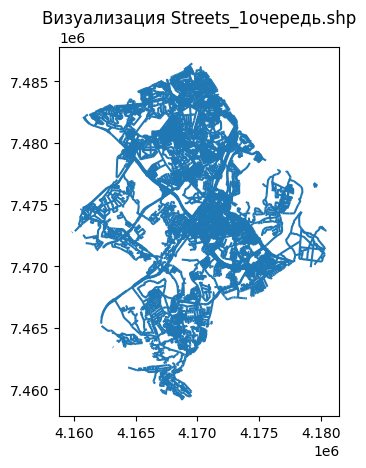


Файл Streets_2очередь.shp:
                       ST_NAME ST_TYP_BEF            ST_NM_BASE  \
0                         None       None                  None   
1  Проектируемый 7048-й проезд     проезд  Проектируемый 7048-й   
2                         None       None                  None   
3                         None       None                  None   
4                         None       None                  None   

                   ROAD_CATEG RoadDirect  RbndStght  RbndBck  Width  \
0         Прочие улицы города          T        1.0      1.0    6.0   
1  Магистральные улицы города        Any        2.0      2.0   12.0   
2         Прочие улицы города          F        1.0      1.0    6.0   
3  Магистральные улицы города          F        2.0      1.0    9.0   
4         Прочие улицы города          T        1.0      1.0    6.0   

   MaxSpdDrct  AvgSpdDrct  MaxSpdRvrs  AvgSpdRvrs  Foot  Car  \
0           0           0          60          51     1    1   
1          60 

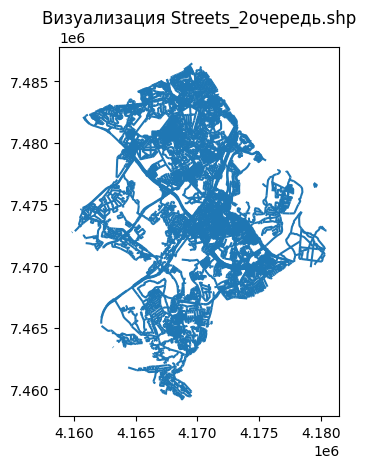


Файл House_3очередь_ЖК.shp:
    Type Purpose  Elevation  Entrances  Apartments    District  \
0  Школы   Школа          2        NaN         NaN  Коммунарка   
1  Школы   Школа          3        NaN         NaN  Коммунарка   
2  Школы   Школа          4        NaN         NaN  Коммунарка   

                 Street  Number  \
0      Потаповская Роща    2 к5   
1  Александры Монаховой     96а   
2      Куприна проспект  24 ст4   

                                            geometry  
0  POLYGON ((4173932.77 7468595.71, 4173947.46 74...  
1  MULTIPOLYGON (((4173174.84 7467838.91, 4173121...  
2  POLYGON ((4171929.5 7468434.42, 4171913.59 746...  


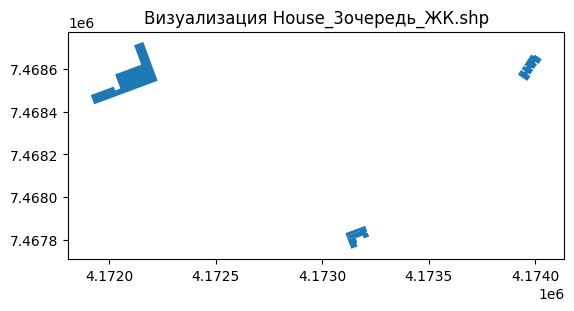


Файл Streets_3очередь.shp:
  ST_NAME ST_TYP_BEF ST_NM_BASE                 ROAD_CATEG RoadDirect  \
0    None       None       None  Внутриквартальные проезды        Any   
1    None       None       None  Внутриквартальные проезды        Any   
2    None       None       None  Внутриквартальные проезды        Any   
3    None       None       None  Внутриквартальные проезды        Any   
4    None       None       None  Внутриквартальные проезды        Any   

   RbndStght  RbndBck  Width  MaxSpdDrct  AvgSpdDrct  MaxSpdRvrs  AvgSpdRvrs  \
0        1.0      1.0    6.0          20          20          20          20   
1        1.0      1.0    6.0          20          20          20          20   
2        1.0      1.0    6.0          20          20          20          20   
3        1.0      1.0    6.0          20          20          20          20   
4        1.0      1.0    6.0          20          20          20          20   

   Foot  Car                                        

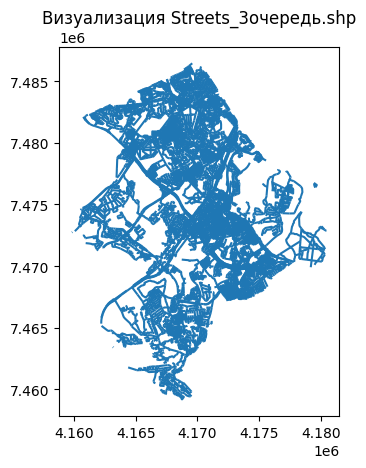


Файл Остановки_ОТ.shp:
                 TrType                      Name          TrStopId  \
0  Автобусная остановка                д. Дудкино  4504282527175082   
1  Автобусная остановка        Академика Семёнова  4504282527177280   
2  Автобусная остановка           СНТ Гавриково-1  4504282527177281   
3  Автобусная остановка  СНТ Берёзка-Коммунарка-1  4504282549350453   
4  Автобусная остановка  СНТ Берёзка-Коммунарка-1  4504282549350455   

                        geometry  
0   POINT (4169298.8 7486206.48)  
1  POINT (4175492.12 7468089.68)  
2  POINT (4174773.19 7467701.78)  
3  POINT (4173317.02 7470985.86)  
4  POINT (4173231.61 7471209.38)  


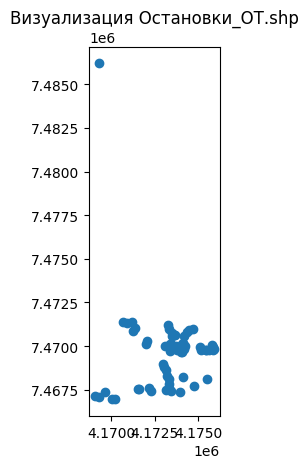


Файл Streets_исходные.shp:
   EdgeId ST_NAME ST_TYP_BEF ST_NM_BASE ST_NM_CITY  FUNC_CLASS  \
0   13604    None       None       None       None           6   
1   13680    None       None       None       None           6   
2   13686    None       None       None       None           6   
3   13741    None       None       None       None           6   
4   13788    None       None       None       None           6   

                  ROAD_CATEG  F_ZLEV  T_ZLEV      TYPE_LINK  ... AvgSpdDrct  \
0  Внутриквартальные проезды       0       0  Обычное звено  ...         20   
1  Внутриквартальные проезды       0       0  Обычное звено  ...         20   
2  Внутриквартальные проезды       0       0  Обычное звено  ...         20   
3  Внутриквартальные проезды       0       0  Обычное звено  ...         20   
4  Внутриквартальные проезды       0       0  Обычное звено  ...         20   

   MaxSpdRvrs  AvgSpdRvrs  Foot Car  duplicat  payment material   length  \
0          20          2

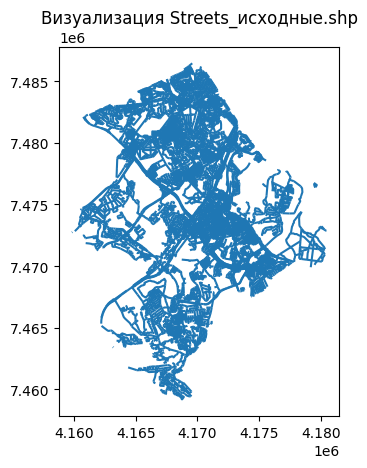


Файл Выходы_метро.shp:
  Number      Text                       geometry
0      7  Потапово  POINT (4173365.25 7470052.91)
1      6  Потапово  POINT (4173441.38 7470047.67)
2      5  Потапово  POINT (4173487.05 7469711.73)
3      3  Потапово  POINT (4173976.09 7469745.93)
4      4  Потапово  POINT (4174093.74 7469755.22)


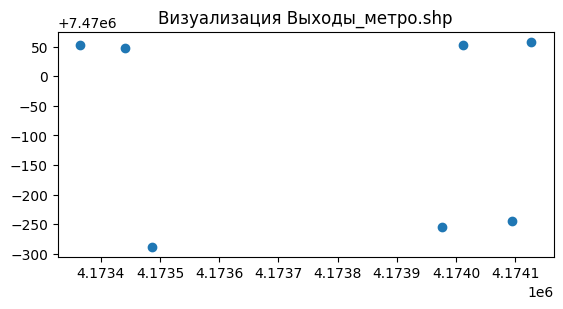


Файл Streets_3очередь.dbf:
Поля: ['ST_NAME', 'ST_TYP_BEF', 'ST_NM_BASE', 'ROAD_CATEG', 'RoadDirect', 'RbndStght', 'RbndBck', 'Width', 'MaxSpdDrct', 'AvgSpdDrct', 'MaxSpdRvrs', 'AvgSpdRvrs', 'Foot', 'Car']
Record #0: ['', '', '', 'Внутриквартальные проезды', 'Any', 1, 1, 6, 20, 20, 20, 20, 1, 1]
Record #1: ['', '', '', 'Внутриквартальные проезды', 'Any', 1, 1, 6, 20, 20, 20, 20, 1, 1]
Record #2: ['', '', '', 'Внутриквартальные проезды', 'Any', 1, 1, 6, 20, 20, 20, 20, 1, 1]
Record #3: ['', '', '', 'Внутриквартальные проезды', 'Any', 1, 1, 6, 20, 20, 20, 20, 1, 1]
Record #4: ['', '', '', 'Внутриквартальные проезды', 'Any', 1, 1, 6, 20, 20, 20, 20, 1, 1]

Файл House_1очередь_ЖК.dbf:
Поля: ['Type', 'Purpose', 'Elevation', 'Entrances', 'Apartments', 'District', 'Street', 'Number']
Record #0: ['Жилые дома', 'Малоэтажный жилой дом', 3, 4, 86, 'Коммунарка', 'Потаповская Роща', '2 к3']
Record #1: ['Жилые дома', 'Малоэтажный жилой дом', 3, 4, 86, 'Коммунарка', 'Потаповская Роща', '1 к2']
Record

In [63]:
folder_path = '/content/data/Векторные данные/'

all_files = os.listdir(folder_path)
shp_files = [file for file in all_files if file.endswith('.shp')]
dbf_files = [file for file in all_files if file.endswith('.dbf')]
shx_files = [file for file in all_files if file.endswith('.shx')]
prj_files = [file for file in all_files if file.endswith('.prj')]
cpg_files = [file for file in all_files if file.endswith('.cpg')]
qmd_files = [file for file in all_files if file.endswith('.qmd')]

# Шаг 1: Анализ Shapefile (.shp)
for shp_file in shp_files:
    shp_path = os.path.join(folder_path, shp_file)
    print(f'\nФайл {shp_file}:')
    shp_data = gpd.read_file(shp_path)
    print(shp_data.head())
    # Визуализация файла .shp
    shp_data.plot()
    plt.title(f'Визуализация {shp_file}')
    plt.show()

# Шаг 2: Анализ файлов .dbf
for dbf_file in dbf_files:
    dbf_path = os.path.join(folder_path, dbf_file)
    print(f'\nФайл {dbf_file}:')
    with shapefile.Reader(dbf_path) as sf:
        fields = sf.fields[1:]  # Пропускаем первый элемент, так как он является "удалённым" идентификатором
        field_names = [field[0] for field in fields]
        print(f'Поля: {field_names}')
        records = sf.records()[:5]
        for record in records:
            print(record)

# Шаг 3: Анализ файлов .shx (индекс)
for shx_file in shx_files:
    shx_path = os.path.join(folder_path, shx_file)
    print(f'\nФайл {shx_file} - индексный файл для {shx_file.replace(".shx", ".shp")}')

# Шаг 4: Анализ файлов проекции (.prj)
for prj_file in prj_files:
    prj_path = os.path.join(folder_path, prj_file)
    print(f'\nФайл {prj_file}:')
    with open(prj_path, 'r') as file:
        projection_info = file.read()
        print(projection_info)

# Шаг 5: Анализ файлов кодировки (.cpg)
for cpg_file in cpg_files:
    cpg_path = os.path.join(folder_path, cpg_file)
    print(f'\nФайл {cpg_file}:')
    with open(cpg_path, 'r') as file:
        encoding_info = file.read()
        print(f'Кодировка: {encoding_info}')

# Шаг 6: Анализ QGIS Metadata (.qmd)
for qmd_file in qmd_files:
    qmd_path = os.path.join(folder_path, qmd_file)
    print(f'\nФайл {qmd_file} - метаданные QGIS, используемые для хранения настроек проекта.')
